# Relatório Intermediário - Alinhamento de Sequencias de DNA

Feito por: Henrique Thomé

 Nesse relatório será comparado três estratégias para o alinhamento de sequências de DNA, comparando, o score e seus respectivos tempos de execução. As estratégias são: Alinhamento local de Smith-Waterman, Busca Local e Busca Exaustiva.

### Alinhamento Local de Smith-Waterman

O algoritmo de Smith-Waterman consiste em montar uma matrix que relaciona as duas sequências, uma em cada eixo. Cada item é o maior valor entre seus vizinhos: diagonal - mais o score entre os dois caracteres em si- de cima e da esquerda. <br>
Feito isso, o maior valor é identificado e depois o caminho que o levou até lá é achado, identificando, assim, a maior sequência de alinhamento.<br>
Mais informações sobre o algoritmo diponíveis em: https://pt.wikipedia.org/wiki/Algoritmo_de_Smith-Waterman

### Busca Local Aleatória

O algoritmo consiste em selecionar uma subsequência aleatória do primeiro DNA, depois gerar p subsequências aleatórias de tamanho igual à primeira subsequência. Feito isso, comparar todas as sequências e salvar o score máximo 

### Busca Exaustiva

A busca exaustiva consiste em achar todas as subsequências possíveis de ambos os DNAs e comparar todas com todas, achando assim o valor máximo global. <br>
Não é possível fornecer o score de sequências de tamanhos diferentes, assim quando existe essa comparação, existem dois aproachs analisados: Usar o algorítmo de Smith-Waterman, ou o algorítmo de busca local. <br>
Ao fazer uma análise da segunda opção, pode-se perceber que seria reduntante, uma vez que se truncarmos a sequência, seria gerado uma subsequência já existente dentro do universo de busca. 

### Comparação

Para realizar as comparações, vamos definir os sequintes parâmetros:<br>
- Serão geradas 50 pares sequências de DNA tendo cada uma delas de 10 até 360 caracteres; [1]
- Os scores são: Mismatch e Gap = -1, match = 2; 
- As sequências de DNA terão mesmo tamanho
<br>
* [1] O nũmero mãximo de 360 foi definido, pois não havia tempo habil disponível para testes maiores, sendo que o gargalo foi o tempo de execução da busca exaustiva

In [13]:
import subprocess
import time
def roda_com_entrada(ex, in_f):
    with open(in_f) as f:
        start = time.perf_counter()
        proc = subprocess.run([ex], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return proc.stdout, end-start

In [14]:
tempExec = []
listaScore = []
i = 0
while i <= 50:
    in_f = "./DNASequence/Sequences/dna" + str(i)
    out,tempo = roda_com_entrada("./ExhaustiveSearch/exhaustiveSearch",in_f)
    tempExec.append(tempo)
    score = out.split("\n")
    score = score[0]
    listaScore.append(score)
    i+=1


Text(0.5, 0, 'Tamanho das sequencias de DNA')

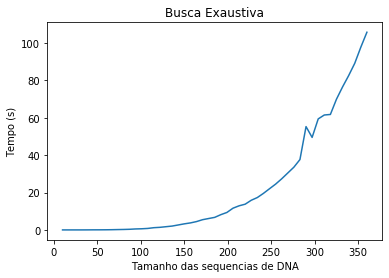

In [34]:
import matplotlib.pyplot as plt
tamanhos = list(range(10, 364,7))
plt.plot(tamanhos,tempExec)
plt.title("Busca Exaustiva")
plt.ylabel("Tempo (s)")
plt.xlabel("Tamanho das sequencias de DNA")

Como podemos analisar no gráfico, podemos observar um crescimento exponencial, conforme o tamanho das sequências de DNA crescem. Esse comportamento pode ser explicado pelo fato de que todas as subsequências de ambos os DNAs precisam ser geradas, de forma que o número de subsequências cresce exponecialmente.

In [50]:
tempExecSW = []
listaScoreSW = []
i = 0
while i <= 50:
    in_f = "./DNASequence/Sequences/dna" + str(i)
    out,tempo = roda_com_entrada("./SmithWatermanSuperComp/SmithWaterman",in_f)
    tempExecSW.append(tempo)
    score = out.split("\n")
    score = score[2]
    listaScoreSW.append(int(score))
    i+=1

[]

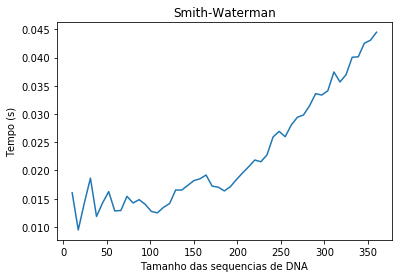

In [51]:
tamanhos = list(range(10, 364,7))
plt.plot(tamanhos,tempExecSW)
plt.title("Smith-Waterman")
plt.ylabel("Tempo (s)")
plt.xlabel("Tamanho das sequencias de DNA")
plt.plot()

O tempo de execução do algoritmo de Smith-Waterman, apesar de algumas anomalias, picos, cresce de forma linear.

In [52]:
tempExecBA = []
listaScoreBA = []
i = 0
while i <= 50:
    in_f = "./DNASequence/Sequences/dna" + str(i)
    out,tempo = roda_com_entrada("./LocalSearch/LocalSearch",in_f)
    tempExecBA.append(tempo)
    score = out.split("\n")
    score = score[0]
    listaScoreBA.append(int(score))
    i+=1

[]

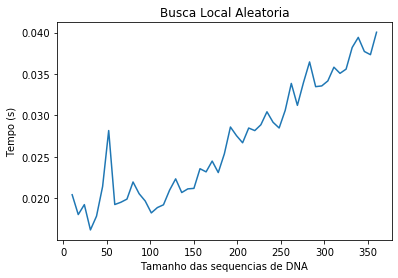

In [53]:
plt.plot(tamanhos,tempExecBA)
plt.title("Busca Local Aleatoria")
plt.ylabel("Tempo (s)")
plt.xlabel("Tamanho das sequencias de DNA")
plt.plot()

A hipótese incial era de que, por se tratar de números aleatórios, o tempo de execução não teria uma grande variação conforme o aumento do tamanho da sequência. Após o resultado, o código foi revisitado. Com a analise, pode-se perceber que o valor k, apesar de ser escolhido aleatóriamente, é gerado entre 0 e o tamanho da sequência. Dessa forma, com uma sequência grande, o k tem grande chance que ser maior, o que aumenta o espaço de busca, explicando o comportamento linear do gráfico

### Profiling

Para que seja possível identificar de forma mais precisa onde os algoritmos levam mais tempo para serem executados, será utilizado o tecnica de profiling, através do valgrind

#### Alinhamento Local de Smith-Waterman

![sw](SW.png)

Como podemos ver, o que mais gasta recursos no sistema é a função que monta a matriz que será analisada. O que poderia ser feito é mudar a ordem dos for de modo que o acesso a memória seja feito linearmente.

#### Busca Exaustiva

![exaustiva](Exaustiva.png)

Na busca exaustiva, como todas as substrings são geradas e cada par de substring é comparado, essas são as duas funções que mais gastam recursos. Talvez um paradigma de programação dinâmica poderia ser usado, reaproveitando o score de substrings

#### Busca aleatoria

![aleatoria](Aleatoria.png)

Na busca aleatória, como são gerados muitas substrings, o calculos de score é o que mais gasta recursos. Como na busca exaustiva, talvez poderia ser usado uma estrutura de dados para reutilizar os calculos

### Conclusão

Ao analisar os tempos de execução podemos verificar que o algoritmo de busca exaustiva é o mais demorado e que mais consome recursos da máquina. Os outros dois, Smith Waterman e Busca aleatõria, tem tempos de execução similares. <br>
Apesar disso, todos os algoritmos poderiam ser alvos de otimização, com as técnicas mencionadas anteriormente, ou com a aplicação de tecnicas de paralelismo.